## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import collections
from sklearn import preprocessing
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder

### Importing the Dataset

In [2]:
data = pd.read_csv('H2HBABBA3080.csv')

In [3]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200526831,PERISH trust,2019-11-26 00:00:00,2019.0,1.930142e+09,2019-11-12,20191112,20191112,20191127.0,USD,RV,1.0,NaN,135535.45,20191112.0,NAA8,1.930142e+09,0
1,U001,CCU002,KRFT FDS llc,2019-03-01 00:00:00,2019.0,1.928694e+09,2019-01-31,20190127,20190131,20190307.0,USD,RV,1.0,NaN,10003.92,20190131.0,NAG2,1.928694e+09,0
2,CA02,0140106231,PRATT llc,2019-09-25 00:00:00,2019.0,2.960577e+09,2019-08-31,20190903,20190831,20190917.0,CAD,RV,1.0,NaN,31225.00,20190907.0,CA10,2.960577e+09,0
3,U001,0200020431,DEC corporation,2019-04-01 00:00:00,2019.0,1.929024e+09,2019-03-25,20190325,20190325,20190408.0,USD,RV,1.0,NaN,5315.92,20190316.0,NAM4,1.929024e+09,0
4,CA02,0140104429,COSTCO systems,NaN,2020.0,2.960634e+09,2020-05-10,20200510,20200510,20200521.0,CAD,RV,1.0,NaN,36169.50,20200511.0,CA10,2.960634e+09,1


In [4]:
data.shape

(50000, 19)

In [5]:
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

In [6]:
# creating a dataframe of the dataset
df = pd.DataFrame(data)

# Preprocessing

### Removing null values and Duplicates

In [7]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

In [8]:
df.nunique()  # finds total unique values per column

business_code                 5
cust_number                1430
name_customer              4155
clear_date                  393
buisness_year                 2
doc_id                    48868
posting_date                502
document_create_date        505
document_create_date.1      502
due_in_date                 553
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44251
baseline_create_date        503
cust_payment_terms           68
invoice_id                48860
isOpen                        2
dtype: int64

In [9]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3125,CA02,0140106408,WAL-M us,2019-02-19 00:00:00,2019.0,2.960524e+09,2019-01-23,20190123,20190123,20190202.0,CAD,RV,1.0,NaN,9171.02,20190123.0,CA10,2.960524e+09,0
3429,U001,0200769623,WAL-MAR associates,2019-12-09 00:00:00,2019.0,1.930196e+09,2019-11-28,20191126,20191128,20191213.0,USD,RV,1.0,NaN,13718.92,20191128.0,NAH4,1.930196e+09,0
3446,U001,200794332,COST systems,2019-04-19 00:00:00,2019.0,1.929077e+09,2019-04-04,20190403,20190404,20190419.0,USD,RV,1.0,NaN,15703.20,20190404.0,NAAX,1.929077e+09,0
3510,U001,0200609331,KROG associates,2019-03-18 00:00:00,2019.0,1.928889e+09,2019-03-02,20190302,20190302,20190317.0,USD,RV,1.0,NaN,15500.75,20190302.0,NAA8,1.928889e+09,0
4472,U001,0200797452,US foundation,2019-10-31 00:00:00,2019.0,1.930013e+09,2019-10-15,20191015,20191015,20191030.0,USD,RV,1.0,NaN,69573.01,20191015.0,NAA8,1.930013e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49919,U001,0200793568,SUPE corp,2019-04-18 00:00:00,2019.0,1.929073e+09,2019-04-02,20190402,20190402,20190417.0,USD,RV,1.0,NaN,22298.84,20190402.0,NAA8,1.929073e+09,0
49951,U001,0200769623,WAL-MAR foundation,2019-03-13 00:00:00,2019.0,1.928855e+09,2019-02-25,20190225,20190225,20190312.0,USD,RV,1.0,NaN,54498.43,20190225.0,NAH4,1.928855e+09,0
49953,U001,0200769623,WAL-MAR,2019-05-06 00:00:00,2019.0,1.929205e+09,2019-04-25,20190425,20190425,20190510.0,USD,RV,1.0,NaN,33101.75,20190425.0,NAH4,1.929205e+09,0
49975,U001,0200762301,C&S WH in,2020-02-21 00:00:00,2020.0,1.930476e+09,2020-02-06,20200204,20200206,20200221.0,USD,RV,1.0,NaN,90796.08,20200206.0,NAC6,1.930476e+09,0


In [10]:
# dropping duplicate values to avoid over
df=df.drop_duplicates()

#### making the copy of final test data

In [11]:
main_test=df[df['clear_date'].isnull()]

In [12]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 9706
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             48868
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

In [13]:
df[df.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1149,CA02,0100030194,AMAZO,2019-05-23 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190313,20190323.0,CAD,X2,1.0,NaN,16418.95,20190313.0,CA10,NaN,0
11607,CA02,0140106054,TREE in,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190328,20190407.0,CAD,X2,1.0,NaN,216.80,20190328.0,CA10,NaN,0
17119,CA02,0140104409,LOB associates,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190319,20190329.0,CAD,X2,1.0,NaN,179.20,20190319.0,CA10,NaN,0
20310,CA02,0140104409,LOB in,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190225,20190307.0,CAD,X2,1.0,NaN,15922.44,20190225.0,CA10,NaN,0
21203,CA02,0140104429,COSTCO us,2019-05-22 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190322,20190401.0,CAD,X2,1.0,NaN,5353.20,20190322.0,CA10,NaN,0
25139,CA02,0140104409,LOB associates,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190131,20190210.0,CAD,X2,1.0,NaN,20472.48,20190131.0,CA10,NaN,0
46553,CA02,0100030194,AMAZO co,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190305,20190315.0,CAD,X2,1.0,NaN,773.80,20190305.0,CA10,NaN,0
49238,CA02,0140106054,TREE trust,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190228,20190310.0,CAD,X2,1.0,NaN,216.80,20190228.0,CA10,NaN,0


In [14]:
df=df[df.invoice_id.isnull()==False]

In [15]:
df.nunique()

business_code                 5
cust_number                1430
name_customer              4153
clear_date                  393
buisness_year                 2
doc_id                    48860
posting_date                502
document_create_date        505
document_create_date.1      502
due_in_date                 553
invoice_currency              2
document type                 1
posting_id                    1
area_business                 0
total_open_amount         44244
baseline_create_date        503
cust_payment_terms           68
invoice_id                48860
isOpen                        2
dtype: int64

### Date Time Conversion

In [16]:
# converting columns to their respective datetine format
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

### Replacing multiple unique values

In [17]:
df['business_code'].value_counts()

U001    44461
CA02     3659
U013      594
U002      133
U005       13
Name: business_code, dtype: int64

In [18]:
df['business_code'] = np.where(df['business_code'].isin(["U013","U002","U005"]),"Other",df['business_code'])
df['business_code'].value_counts()

U001     44461
CA02      3659
Other      740
Name: business_code, dtype: int64

In [19]:
# taking substring of company name without last word
df.name_customer=df.name_customer.str.rsplit(' ',1).str[0]

In [20]:
df.name_customer.nunique()

912

#### Grouping columns with high number of unique values by their frequency
Here we group those values that are not repeated many times to avoid unseen data

In [21]:
df['Frequency_name']=df['name_customer'].replace(df['name_customer'].value_counts())

In [22]:
df['Frequency_numb']=df['cust_number'].replace(df['cust_number'].value_counts())

In [23]:
df['Frequency_name'].values[df['Frequency_name'] < 40] = 50

In [24]:
df['Frequency_numb'].values[df['Frequency_numb'] < 40] = 50

In [25]:
df.Frequency_name.nunique()

98

In [26]:
df.Frequency_numb.nunique()

109

In [27]:
list(df['cust_payment_terms'].value_counts())

[19481,
 13602,
 3586,
 1751,
 1324,
 1206,
 890,
 882,
 876,
 797,
 645,
 619,
 572,
 447,
 328,
 299,
 247,
 212,
 207,
 115,
 107,
 81,
 81,
 72,
 55,
 37,
 32,
 30,
 29,
 26,
 23,
 23,
 22,
 14,
 11,
 10,
 10,
 10,
 9,
 8,
 7,
 7,
 7,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [28]:
df['Frequency_terms']=df['cust_payment_terms'].replace(df['cust_payment_terms'].value_counts())

In [29]:
df['Frequency_terms'].values[df['Frequency_terms'] < 30] = 50

In [30]:
list(df['Frequency_terms'].value_counts())

[19481,
 13602,
 3586,
 1751,
 1324,
 1206,
 890,
 882,
 876,
 797,
 645,
 619,
 572,
 447,
 328,
 299,
 279,
 247,
 212,
 207,
 162,
 115,
 107,
 72,
 55,
 37,
 32,
 30]

In [31]:
# finding correlation between columns
df.corr(method ='pearson')

,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,Frequency_name,Frequency_numb,Frequency_terms
buisness_year,1.000000,-0.014148,NaN,NaN,0.004267,-0.014148,0.751808,0.028429,0.034866,0.021391
doc_id,-0.014148,1.000000,NaN,NaN,0.181505,1.000000,-0.013111,-0.185533,-0.173348,-0.320577
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,0.004267,0.181505,NaN,NaN,1.000000,0.181505,0.008264,-0.155698,-0.144285,0.049324
invoice_id,-0.014148,1.000000,NaN,NaN,0.181505,1.000000,-0.013111,-0.185533,-0.173348,-0.320577
isOpen,0.751808,-0.013111,NaN,NaN,0.008264,-0.013111,1.000000,0.040192,0.040763,0.034784
Frequency_name,0.028429,-0.185533,NaN,NaN,-0.155698,-0.185533,0.040192,1.000000,0.958468,0.106357
Frequency_numb,0.034866,-0.173348,NaN,NaN,-0.144285,-0.173348,0.040763,0.958468,1.000000,0.104395
Frequency_terms,0.021391,-0.320577,NaN,NaN,0.049324,-0.320577,0.034784,0.106357,0.104395,1.000000


In [32]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Frequency_name,Frequency_numb,Frequency_terms
0,U001,0200526831,PERISH,2019-11-26,2019.0,1.930142e+09,2019-11-12,2019-11-12,2019-11-12,2019-11-27,...,1.0,NaN,135535.45,2019-11-12,NAA8,1.930142e+09,0,79,74,19481
1,U001,CCU002,KRFT FDS,2019-03-01,2019.0,1.928694e+09,2019-01-31,2019-01-27,2019-01-31,2019-03-07,...,1.0,NaN,10003.92,2019-01-31,NAG2,1.928694e+09,0,149,149,797
2,CA02,0140106231,PRATT,2019-09-25,2019.0,2.960577e+09,2019-08-31,2019-09-03,2019-08-31,2019-09-17,...,1.0,NaN,31225.00,2019-09-07,CA10,2.960577e+09,0,50,50,3586
3,U001,0200020431,DEC,2019-04-01,2019.0,1.929024e+09,2019-03-25,2019-03-25,2019-03-25,2019-04-08,...,1.0,NaN,5315.92,2019-03-16,NAM4,1.929024e+09,0,1133,318,1324
4,CA02,0140104429,COSTCO,NaT,2020.0,2.960634e+09,2020-05-10,2020-05-10,2020-05-10,2020-05-21,...,1.0,NaN,36169.50,2020-05-11,CA10,2.960634e+09,1,456,411,3586


### Splitting the Dataset into train and final test

In [33]:
# sorting by baseline_create_date as it is the date when invoice was created
df.sort_values(by=['baseline_create_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Frequency_name,Frequency_numb,Frequency_terms
41806,CA02,0140106408,WAL-M,2019-06-03,2019.0,2.960553e+09,2019-06-03,2019-06-03,2019-06-03,2018-03-18,...,1.0,NaN,2168.32,2018-03-08,CA10,2.960553e+09,0,542,481,3586
18923,CA02,0140104429,COSTCO,2019-02-20,2019.0,2.960522e+09,2019-01-11,2019-01-11,2019-01-11,2019-01-06,...,1.0,NaN,2329.20,2018-12-27,CA10,2.960522e+09,0,456,411,3586
16981,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,1.0,NaN,20417.83,2018-12-30,NAH4,1.928542e+09,0,12374,11576,13602
23242,U001,0200744019,TARG,2019-01-11,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,1.0,NaN,24839.07,2018-12-30,NAA8,1.928541e+09,0,1107,1047,19481
6775,U001,CCU013,KRAFT F,2019-03-01,2019.0,1.928517e+09,2018-12-30,2018-12-31,2018-12-30,2018-12-30,...,1.0,NaN,10689.05,2018-12-30,NAX2,1.928517e+09,0,605,605,619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16761,U001,0200424504,M,NaT,2020.0,1.930855e+09,2020-05-05,2020-05-04,2020-05-05,2020-05-15,...,1.0,NaN,1080.64,2020-05-15,NACH,1.930855e+09,1,50,50,50
36580,CA02,0140104240,FEDER,NaT,2020.0,2.960633e+09,2020-05-08,2020-05-08,2020-05-08,2020-05-26,...,1.0,NaN,95271.32,2020-05-16,CA10,2.960633e+09,1,63,53,3586
6042,U001,0200915438,GROC,NaT,2020.0,1.930907e+09,2020-05-18,2020-05-16,2020-05-18,2020-06-02,...,1.0,NaN,9291.00,2020-05-18,NAA8,1.930907e+09,1,171,107,19481
41965,U001,0200763229,MAINES,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-05-18,2020-06-02,...,1.0,NaN,21362.82,2020-05-18,NAA8,1.930915e+09,1,64,50,19481


#### Taking values which have clear date null as final test set

In [34]:
final_test=df[df['clear_date'].isnull()]

In [35]:
df = df[df['clear_date'].notnull()]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39154 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39154 non-null  object        
 1   cust_number             39154 non-null  object        
 2   name_customer           39154 non-null  object        
 3   clear_date              39154 non-null  datetime64[ns]
 4   buisness_year           39154 non-null  float64       
 5   doc_id                  39154 non-null  float64       
 6   posting_date            39154 non-null  datetime64[ns]
 7   document_create_date    39154 non-null  datetime64[ns]
 8   document_create_date.1  39154 non-null  datetime64[ns]
 9   due_in_date             39154 non-null  datetime64[ns]
 10  invoice_currency        39154 non-null  object        
 11  document type           39154 non-null  object        
 12  posting_id              39154 non-null  float6

In [37]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9706 entries, 4 to 49996
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9706 non-null   object        
 1   cust_number             9706 non-null   object        
 2   name_customer           9706 non-null   object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           9706 non-null   float64       
 5   doc_id                  9706 non-null   float64       
 6   posting_date            9706 non-null   datetime64[ns]
 7   document_create_date    9706 non-null   datetime64[ns]
 8   document_create_date.1  9706 non-null   datetime64[ns]
 9   due_in_date             9706 non-null   datetime64[ns]
 10  invoice_currency        9706 non-null   object        
 11  document type           9706 non-null   object        
 12  posting_id              9706 non-null   float64

## Extracting the target variable

In [38]:
df['delay']=df['due_in_date']-df['clear_date']

In [39]:
df['delay']

0        1 days
1        6 days
2       -8 days
3        7 days
6       -2 days
          ...  
49994   -1 days
49995    0 days
49997   -2 days
49998    5 days
49999    2 days
Name: delay, Length: 39154, dtype: timedelta64[ns]

In [40]:
# converting delay to int
df['delay'] = df['delay'].dt.days.astype('int32')

## Test, Train, Val Split

In [41]:
X = df.drop('delay',axis=1)

y = df['delay']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [43]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [44]:
X_train.shape , X_val.shape , X_test.shape

((27407, 22), (5873, 22), (5874, 22))

In [45]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Frequency_name,Frequency_numb,Frequency_terms
0,U001,0200526831,PERISH,2019-11-26,2019.0,1.930142e+09,2019-11-12,2019-11-12,2019-11-12,2019-11-27,...,1.0,NaN,135535.45,2019-11-12,NAA8,1.930142e+09,0,79,74,19481
1,U001,CCU002,KRFT FDS,2019-03-01,2019.0,1.928694e+09,2019-01-31,2019-01-27,2019-01-31,2019-03-07,...,1.0,NaN,10003.92,2019-01-31,NAG2,1.928694e+09,0,149,149,797
2,CA02,0140106231,PRATT,2019-09-25,2019.0,2.960577e+09,2019-08-31,2019-09-03,2019-08-31,2019-09-17,...,1.0,NaN,31225.00,2019-09-07,CA10,2.960577e+09,0,50,50,3586
3,U001,0200020431,DEC,2019-04-01,2019.0,1.929024e+09,2019-03-25,2019-03-25,2019-03-25,2019-04-08,...,1.0,NaN,5315.92,2019-03-16,NAM4,1.929024e+09,0,1133,318,1324
6,U001,0200795490,HY -,2019-04-23,2019.0,1.929100e+09,2019-04-06,2019-04-06,2019-04-06,2019-04-21,...,1.0,NaN,89618.36,2019-04-06,NAA8,1.929100e+09,0,93,89,19481


## EDA

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

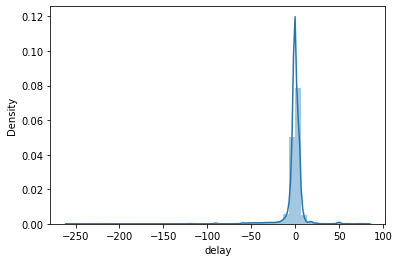

In [46]:
sns.distplot(y_train)

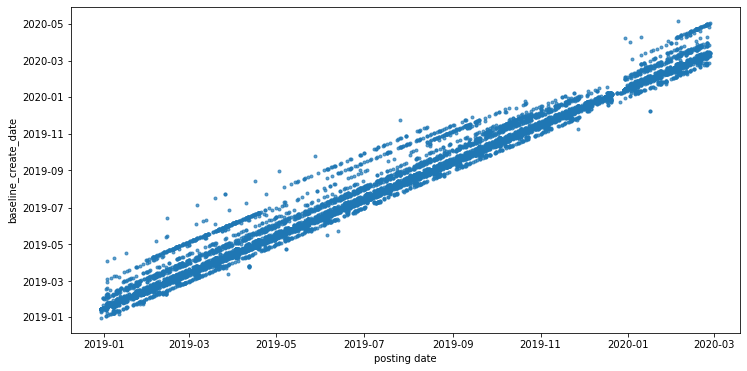

In [47]:
plt.figure(figsize=(12,6))
plt.xlabel("posting date")
plt.ylabel("baseline_create_date")
plt.plot(X_train.posting_date, X_train.due_in_date,'.', alpha = 0.7)# remove either

<AxesSubplot:xlabel='total_open_amount'>

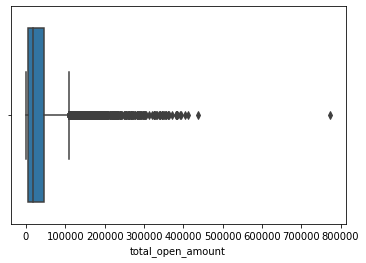

In [48]:
sns.boxplot(data=X_train,x=X_train['total_open_amount']) #A way to know whether there are outliers

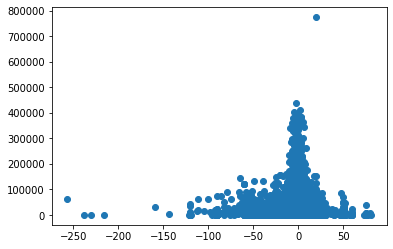

In [49]:
plt.scatter(y_train,X_train['total_open_amount'])

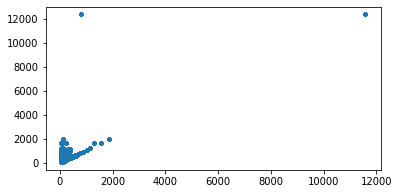

In [50]:
plt.figure(figsize=(6,3))
plt.plot(X_train.Frequency_numb, X_train.Frequency_name,'.', alpha = 0.7)#Remove either

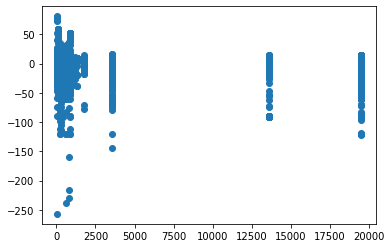

In [51]:
plt.scatter(X_train['Frequency_terms'], y_train)

## Feature Engineering

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27407 entries, 0 to 34798
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27407 non-null  object        
 1   cust_number             27407 non-null  object        
 2   name_customer           27407 non-null  object        
 3   clear_date              27407 non-null  datetime64[ns]
 4   buisness_year           27407 non-null  float64       
 5   doc_id                  27407 non-null  float64       
 6   posting_date            27407 non-null  datetime64[ns]
 7   document_create_date    27407 non-null  datetime64[ns]
 8   document_create_date.1  27407 non-null  datetime64[ns]
 9   due_in_date             27407 non-null  datetime64[ns]
 10  invoice_currency        27407 non-null  object        
 11  document type           27407 non-null  object        
 12  posting_id              27407 non-null  float6

In [53]:
X_train.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Frequency_name,Frequency_numb,Frequency_terms
0,U001,0200526831,PERISH,2019-11-26,2019.0,1.930142e+09,2019-11-12,2019-11-12,2019-11-12,2019-11-27,...,1.0,NaN,135535.45,2019-11-12,NAA8,1.930142e+09,0,79,74,19481
1,U001,CCU002,KRFT FDS,2019-03-01,2019.0,1.928694e+09,2019-01-31,2019-01-27,2019-01-31,2019-03-07,...,1.0,NaN,10003.92,2019-01-31,NAG2,1.928694e+09,0,149,149,797
2,CA02,0140106231,PRATT,2019-09-25,2019.0,2.960577e+09,2019-08-31,2019-09-03,2019-08-31,2019-09-17,...,1.0,NaN,31225.00,2019-09-07,CA10,2.960577e+09,0,50,50,3586
3,U001,0200020431,DEC,2019-04-01,2019.0,1.929024e+09,2019-03-25,2019-03-25,2019-03-25,2019-04-08,...,1.0,NaN,5315.92,2019-03-16,NAM4,1.929024e+09,0,1133,318,1324
6,U001,0200795490,HY -,2019-04-23,2019.0,1.929100e+09,2019-04-06,2019-04-06,2019-04-06,2019-04-21,...,1.0,NaN,89618.36,2019-04-06,NAA8,1.929100e+09,0,93,89,19481
7,U001,0200744019,TARG,2019-12-10,2019.0,1.930189e+09,2019-11-25,2019-11-24,2019-11-25,2019-12-10,...,1.0,NaN,93251.30,2019-11-25,NAA8,1.930189e+09,0,1107,1047,19481
8,U001,0200759878,SA,2019-10-02,2019.0,1.929874e+09,2019-09-16,2019-09-15,2019-09-16,2019-10-01,...,1.0,NaN,2026.91,2019-09-16,NAH4,1.929874e+09,0,1655,1311,13602
9,U001,0200772670,ASSOCIAT,2019-03-18,2019.0,1.928885e+09,2019-03-01,2019-03-01,2019-03-01,2019-03-16,...,1.0,NaN,95063.51,2019-03-01,NAU5,1.928885e+09,0,930,868,890
10,U001,0200126819,MCLANE,2019-08-07,2019.0,1.929634e+09,2019-07-23,2019-07-18,2019-07-23,2019-08-24,...,1.0,NaN,4740.00,2019-07-23,NA32,1.929634e+09,0,128,124,645
12,U001,0200769623,WAL-MAR,2020-02-25,2020.0,1.930503e+09,2020-02-09,2020-02-08,2020-02-09,2020-02-24,...,1.0,NaN,15775.32,2020-02-09,NAH4,1.930503e+09,0,12374,11576,13602


In [54]:
# number of unique values for all 3 sets
X_train.nunique() , X_val.nunique() , X_test.nunique()

(business_code                 3
 cust_number                1186
 name_customer               775
 clear_date                  381
 buisness_year                 2
 doc_id                    27407
 posting_date                422
 document_create_date        425
 document_create_date.1      422
 due_in_date                 484
 invoice_currency              2
 document type                 1
 posting_id                    1
 area_business                 0
 total_open_amount         25259
 baseline_create_date        430
 cust_payment_terms           62
 invoice_id                27407
 isOpen                        1
 Frequency_name               98
 Frequency_numb              109
 Frequency_terms              28
 dtype: int64,
 business_code                3
 cust_number                625
 name_customer              444
 clear_date                 345
 buisness_year                2
 doc_id                    5873
 posting_date               418
 document_create_date       419
 do

#### Dropping null/constant/unique values

In [55]:
diff= X_train['posting_date']-X_train['baseline_create_date']
diff.sum()

Timedelta('661 days 00:00:00')

In [56]:
X_train.corr(method ='pearson')

,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,Frequency_name,Frequency_numb,Frequency_terms
buisness_year,1.000000,-0.005749,NaN,NaN,-0.001217,-0.005749,NaN,-0.002236,0.007847,-0.011818
doc_id,-0.005749,1.000000,NaN,NaN,0.189086,1.000000,NaN,-0.184399,-0.171769,-0.319596
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.001217,0.189086,NaN,NaN,1.000000,0.189086,NaN,-0.147333,-0.134977,0.047570
invoice_id,-0.005749,1.000000,NaN,NaN,0.189086,1.000000,NaN,-0.184399,-0.171769,-0.319596
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency_name,-0.002236,-0.184399,NaN,NaN,-0.147333,-0.184399,NaN,1.000000,0.957195,0.110134
Frequency_numb,0.007847,-0.171769,NaN,NaN,-0.134977,-0.171769,NaN,0.957195,1.000000,0.107430
Frequency_terms,-0.011818,-0.319596,NaN,NaN,0.047570,-0.319596,NaN,0.110134,0.107430,1.000000


In [57]:
# Dropping area_business as it is null, and posting_id,document type and isOpen as they are a single constant value
# Dropping baseline_create_date as it high correlation with posting date, also drop clear_date as it is used in making target variable
X_train=X_train.drop(['area_business','posting_id','isOpen','document type','baseline_create_date','clear_date'], axis = 1)
X_val=X_val.drop(['area_business','posting_id','isOpen','document type','baseline_create_date','clear_date'], axis = 1)
X_test=X_test.drop(['area_business','posting_id','isOpen','document type','baseline_create_date','clear_date'], axis = 1)

# Dropping completely unique columns
X_train=X_train.drop(['invoice_id','doc_id'], axis = 1)
X_val=X_val.drop(['invoice_id','doc_id'], axis = 1)
X_test=X_test.drop(['invoice_id','doc_id'], axis = 1)

# Dropping object type values that were replaced by frequency 
X_train=X_train.drop(['name_customer','cust_number','cust_payment_terms'], axis = 1)
X_val=X_val.drop(['name_customer','cust_number','cust_payment_terms'], axis = 1)
X_test=X_test.drop(['name_customer','cust_number','cust_payment_terms'], axis = 1)

# Dropping either Frequency_numb or Frequency_name due to high correlation
X_train=X_train.drop(['Frequency_name'], axis = 1)
X_val=X_val.drop(['Frequency_name'], axis = 1)
X_test=X_test.drop(['Frequency_name'], axis = 1)

In [58]:
X_train.head()

,business_code,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,Frequency_numb,Frequency_terms
0,U001,2019.0,2019-11-12,2019-11-12,2019-11-12,2019-11-27,USD,135535.45,74,19481
1,U001,2019.0,2019-01-31,2019-01-27,2019-01-31,2019-03-07,USD,10003.92,149,797
2,CA02,2019.0,2019-08-31,2019-09-03,2019-08-31,2019-09-17,CAD,31225.00,50,3586
3,U001,2019.0,2019-03-25,2019-03-25,2019-03-25,2019-04-08,USD,5315.92,318,1324
6,U001,2019.0,2019-04-06,2019-04-06,2019-04-06,2019-04-21,USD,89618.36,89,19481


In [59]:
X_test.business_code.value_counts()

U001     5323
CA02      440
Other     111
Name: business_code, dtype: int64

In [60]:
X_train.cov()

,buisness_year,total_open_amount,Frequency_numb,Frequency_terms
buisness_year,0.115017,-1.623022e+01,1.248753e+01,-3.103615e+01
total_open_amount,-16.230224,1.547225e+09,-2.491249e+07,1.448969e+07
Frequency_numb,12.487529,-2.491249e+07,2.201703e+07,3.903505e+06
Frequency_terms,-31.036150,1.448969e+07,3.903505e+06,5.996547e+07


#### Dropping repeated columns

In [61]:
# document_create_date.1 is same as posting_date
diff= X_train['document_create_date.1']-X_train['posting_date']
diff.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       0 days
1       0 days
2       0 days
3       0 days
6       0 days
         ...  
34793   0 days
34795   0 days
34796   0 days
34797   0 days
34798   0 days
Length: 27407, dtype: timedelta64[ns]>

In [62]:
X_train=X_train.drop(['document_create_date.1'], axis = 1)
X_test=X_test.drop(['document_create_date.1'], axis = 1)
X_val=X_val.drop(['document_create_date.1'], axis = 1)

In [63]:
#from forex_python.converter import CurrencyRates

In [64]:
#c = CurrencyRates()
#X_train['invoice_currency_usd'] = X_train.apply( lambda x: c.convert( x.invoice_currency, 'USD', x.total_open_amount, x.document_create_date), axis = 1)
#X_train['exchangerate'] = X_train['invoice_currency_usd'] / X_train['total_open_amount']

In [65]:
#df['invoice_currency_usd'] = df.apply(lambda x: x.total_open_amount if x.invoice_currency == 'USD' else 
#                               c.convert('CAD', 'USD', x.total_open_amount, x.document_create_date), axis=1)

In [66]:
# converting CAD into USD
li =  ['CAD']
X_train.loc[X_train['invoice_currency'].isin(li), 'total_open_amount'] *= .8
X_test.loc[X_test['invoice_currency'].isin(li), 'total_open_amount'] *= .8
X_val.loc[X_val['invoice_currency'].isin(li), 'total_open_amount'] *= .8

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27407 entries, 0 to 34798
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27407 non-null  object        
 1   buisness_year         27407 non-null  float64       
 2   posting_date          27407 non-null  datetime64[ns]
 3   document_create_date  27407 non-null  datetime64[ns]
 4   due_in_date           27407 non-null  datetime64[ns]
 5   invoice_currency      27407 non-null  object        
 6   total_open_amount     27407 non-null  float64       
 7   Frequency_numb        27407 non-null  int64         
 8   Frequency_terms       27407 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(2), object(2)
memory usage: 2.1+ MB


## Label encoding
Here we encode all the variables that have multiple unique values.

We dont use one hot encoding as the number of unique values is considerably high which will create high number of columns and slow down the model.

In [68]:
code_encoder = LabelEncoder()
code_encoder.fit(X_train['business_code'])

X_train['code_enc'] = code_encoder.transform(X_train['business_code'])
X_test['code_enc'] =code_encoder.transform(X_test['business_code'])
X_val['code_enc'] = code_encoder.transform(X_val['business_code'])

In [69]:
terms_encoder = LabelEncoder()
terms_encoder.fit(X_train['Frequency_terms'])

X_train['terms_enc'] = terms_encoder.transform(X_train['Frequency_terms'])
X_test['terms_enc'] = terms_encoder.transform(X_test['Frequency_terms'])
X_val['terms_enc'] = terms_encoder.transform(X_val['Frequency_terms'])

In [70]:
numb_encoder = LabelEncoder()
numb_encoder.fit(X_train['Frequency_numb'])

X_train['numb_enc'] = numb_encoder.transform(X_train['Frequency_numb'])
X_test['numb_enc'] = numb_encoder.transform(X_test['Frequency_numb'])
X_val['numb_enc'] = numb_encoder.transform(X_val['Frequency_numb'])

#### Dropping columns that are encoded

In [71]:
# Dropping business_code,Frequency_terms and Frequency_numb as it is encoded and invoice_currency as it is converted
X_train=X_train.drop(['business_code','Frequency_numb','Frequency_terms','invoice_currency'], axis = 1)
X_val=X_val.drop(['business_code','Frequency_numb','Frequency_terms','invoice_currency'], axis = 1)
X_test=X_test.drop(['business_code','Frequency_numb','Frequency_terms','invoice_currency'], axis = 1)

In [72]:
X_train.head()

,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,code_enc,terms_enc,numb_enc
0,2019.0,2019-11-12,2019-11-12,2019-11-27,135535.45,2,27,26
1,2019.0,2019-01-31,2019-01-27,2019-03-07,10003.92,2,18,62
2,2019.0,2019-08-31,2019-09-03,2019-09-17,24980.00,0,25,8
3,2019.0,2019-03-25,2019-03-25,2019-04-08,5315.92,2,23,81
6,2019.0,2019-04-06,2019-04-06,2019-04-21,89618.36,2,27,35


### Creating features from the date time columns

In [73]:
X_train['day_of_posting'] = X_train['posting_date'].dt.day
X_train['month_of_posting'] = X_train['posting_date'].dt.month
X_train['quarter_of_posting'] = X_train['posting_date'].dt.quarter
X_train['weekday_of_posting'] = X_train['posting_date'].dt.weekday

X_val['day_of_posting'] = X_val['posting_date'].dt.day
X_val['month_of_posting'] = X_val['posting_date'].dt.month
X_val['quarter_of_posting'] = X_val['posting_date'].dt.quarter
X_val['weekday_of_posting'] = X_val['posting_date'].dt.weekday

X_test['day_of_posting'] = X_test['posting_date'].dt.day
X_test['month_of_posting'] = X_test['posting_date'].dt.month
X_test['quarter_of_posting'] = X_test['posting_date'].dt.quarter
X_test['weekday_of_posting'] = X_test['posting_date'].dt.weekday

In [74]:
X_train['day_of_creation'] = X_train['document_create_date'].dt.day
X_train['month_of_creation'] = X_train['document_create_date'].dt.month
X_train['quarter_of_creation'] = X_train['document_create_date'].dt.quarter
X_train['weekday_of_creation'] = X_train['document_create_date'].dt.weekday

X_val['day_of_creation'] = X_val['document_create_date'].dt.day
X_val['month_of_creation'] = X_val['document_create_date'].dt.month
X_val['quarter_of_creation'] = X_val['document_create_date'].dt.quarter
X_val['weekday_of_creation'] = X_val['document_create_date'].dt.weekday

X_test['day_of_creation'] = X_test['document_create_date'].dt.day
X_test['month_of_creation'] = X_test['document_create_date'].dt.month
X_test['quarter_of_creation'] = X_test['document_create_date'].dt.quarter
X_test['weekday_of_creation'] = X_test['document_create_date'].dt.weekday

In [75]:
X_train['day_due'] = X_train['due_in_date'].dt.day
X_train['month_due'] = X_train['due_in_date'].dt.month
X_train['quarter_due'] = X_train['due_in_date'].dt.quarter
X_train['weekday_due'] = X_train['due_in_date'].dt.weekday

X_val['day_due'] = X_val['due_in_date'].dt.day
X_val['month_due'] = X_val['due_in_date'].dt.month
X_val['quarter_due'] = X_val['due_in_date'].dt.quarter
X_val['weekday_due'] = X_val['due_in_date'].dt.weekday

X_test['day_due'] = X_test['due_in_date'].dt.day
X_test['month_due'] = X_test['due_in_date'].dt.month
X_test['quarter_due'] = X_test['due_in_date'].dt.quarter
X_test['weekday_due'] = X_test['due_in_date'].dt.weekday

#### Dropping converted columns

In [76]:
# Dropping due_in_date,document_create_date and posting_date as it is encoded
X_train=X_train.drop(['posting_date','document_create_date','due_in_date'], axis = 1)
X_val=X_val.drop(['posting_date','document_create_date','due_in_date'], axis = 1)
X_test=X_test.drop(['posting_date','document_create_date','due_in_date'], axis = 1)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27407 entries, 0 to 34798
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   buisness_year        27407 non-null  float64
 1   total_open_amount    27407 non-null  float64
 2   code_enc             27407 non-null  int32  
 3   terms_enc            27407 non-null  int64  
 4   numb_enc             27407 non-null  int64  
 5   day_of_posting       27407 non-null  int64  
 6   month_of_posting     27407 non-null  int64  
 7   quarter_of_posting   27407 non-null  int64  
 8   weekday_of_posting   27407 non-null  int64  
 9   day_of_creation      27407 non-null  int64  
 10  month_of_creation    27407 non-null  int64  
 11  quarter_of_creation  27407 non-null  int64  
 12  weekday_of_creation  27407 non-null  int64  
 13  day_due              27407 non-null  int64  
 14  month_due            27407 non-null  int64  
 15  quarter_due          27407 non-null 

In [78]:
X_train.head()

,buisness_year,total_open_amount,code_enc,terms_enc,numb_enc,day_of_posting,month_of_posting,quarter_of_posting,weekday_of_posting,day_of_creation,month_of_creation,quarter_of_creation,weekday_of_creation,day_due,month_due,quarter_due,weekday_due
0,2019.0,135535.45,2,27,26,12,11,4,1,12,11,4,1,27,11,4,2
1,2019.0,10003.92,2,18,62,31,1,1,3,27,1,1,6,7,3,1,3
2,2019.0,24980.00,0,25,8,31,8,3,5,3,9,3,1,17,9,3,1
3,2019.0,5315.92,2,23,81,25,3,1,0,25,3,1,0,8,4,2,0
6,2019.0,89618.36,2,27,35,6,4,2,5,6,4,2,5,21,4,2,6


In [79]:
X_train.cov()

,buisness_year,total_open_amount,code_enc,terms_enc,numb_enc,day_of_posting,month_of_posting,quarter_of_posting,weekday_of_posting,day_of_creation,month_of_creation,quarter_of_creation,weekday_of_creation,day_due,month_due,quarter_due,weekday_due
buisness_year,0.115017,-5.372109e+00,0.001587,-0.011801,0.292431,0.033336,-0.511549,-0.154127,-0.013457,0.018802,-0.494806,-0.149287,-0.013967,-0.000418,-0.545714,-0.178278,-0.011519
total_open_amount,-5.372109,1.371303e+09,-2186.378296,15917.004646,-140908.709649,7116.104577,4000.837084,1298.927005,-80.073255,7972.361932,3743.219584,1222.534818,488.613394,-5338.573962,4276.911692,1278.082260,312.366630
code_enc,0.001587,-2.186378e+03,0.294231,0.155742,3.387544,-0.051297,-0.020124,-0.006207,0.016977,-0.082271,-0.018559,-0.005943,0.015823,0.000150,-0.021717,-0.005710,-0.038991
terms_enc,-0.011801,1.591700e+04,0.155742,22.405506,28.161600,-0.015487,0.438882,0.131371,0.253017,0.190891,0.445627,0.128352,0.490686,-0.260853,-0.395017,-0.121192,0.129331
numb_enc,0.292431,-1.409087e+05,3.387544,28.161600,1444.101460,1.284400,3.088198,0.854938,9.647207,5.532759,2.707942,0.752329,7.793208,-2.485239,0.197184,-0.135800,-0.786240
day_of_posting,0.033336,7.116105e+03,-0.051297,-0.015487,1.284400,75.268543,-1.064295,-0.288053,-0.129625,62.622241,-1.294831,-0.347810,-0.137236,-28.786442,0.824203,0.142447,-0.189695
month_of_posting,-0.511549,4.000837e+03,-0.020124,0.438882,3.088198,-1.064295,12.132033,3.825412,-0.014065,-0.979883,11.904031,3.758292,0.202498,1.596896,11.050369,3.589615,-0.174142
quarter_of_posting,-0.154127,1.298927e+03,-0.006207,0.131371,0.854938,-0.288053,3.825412,1.272489,-0.023625,-0.251838,3.763540,1.251569,0.045679,0.477155,3.520168,1.162216,-0.051804
weekday_of_posting,-0.013457,-8.007326e+01,0.016977,0.253017,9.647207,-0.129625,-0.014065,-0.023625,3.346390,0.020969,-0.022886,-0.014617,1.438754,-0.265683,0.051939,-0.000201,0.911263
day_of_creation,0.018802,7.972362e+03,-0.082271,0.190891,5.532759,62.622241,-0.979883,-0.251838,0.020969,75.702913,-0.694642,-0.178261,-0.141053,-29.235750,0.619535,0.114952,0.011466


## Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

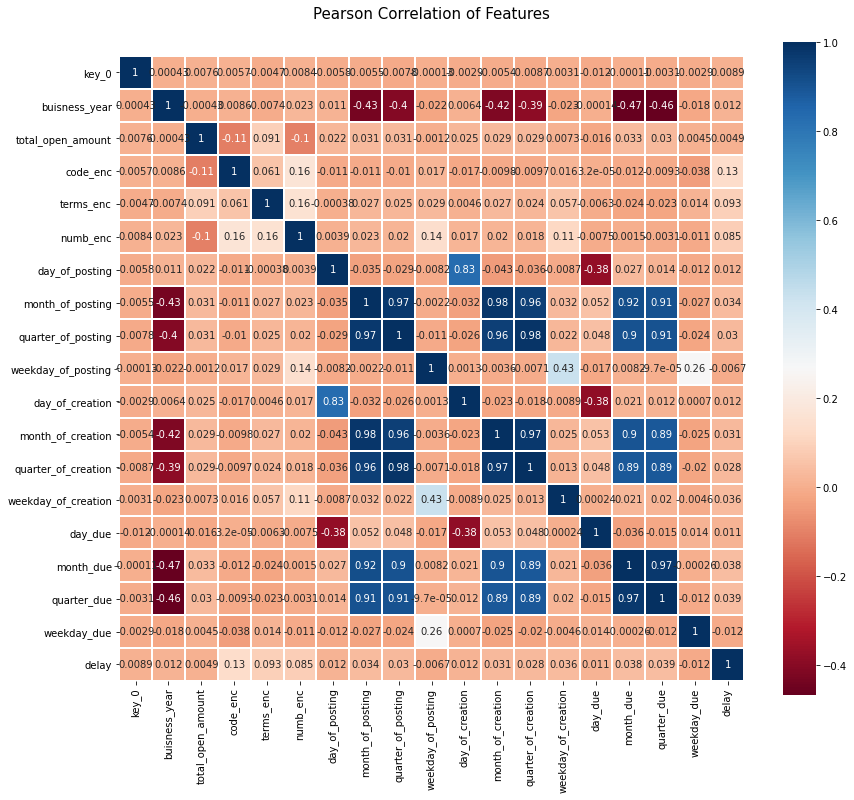

In [80]:
# heatmap gives correlation between different values and target variable
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Dropping columns which have high correlation with each other

In [81]:
X_train=X_train.drop(['month_of_posting','quarter_of_posting','month_due','quarter_due','day_of_creation','quarter_of_creation','buisness_year'], axis = 1)
X_val=X_val.drop(['month_of_posting','quarter_of_posting','month_due','quarter_due','day_of_creation','quarter_of_creation','buisness_year'], axis = 1)
X_test=X_test.drop(['month_of_posting','quarter_of_posting','month_due','quarter_due','day_of_creation','quarter_of_creation','buisness_year'], axis = 1)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

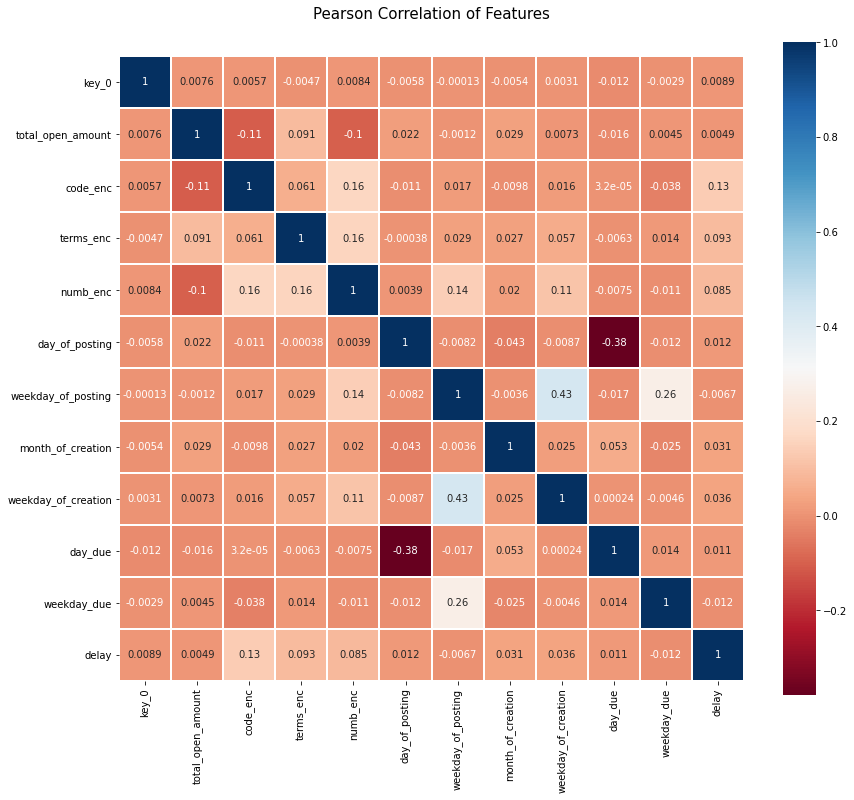

In [82]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [83]:
X_train

,total_open_amount,code_enc,terms_enc,numb_enc,day_of_posting,weekday_of_posting,month_of_creation,weekday_of_creation,day_due,weekday_due
0,135535.450,2,27,26,12,1,11,1,27,2
1,10003.920,2,18,62,31,3,1,6,7,3
2,24980.000,0,25,8,31,5,9,1,17,1
3,5315.920,2,23,81,25,0,3,0,8,0
6,89618.360,2,27,35,6,5,4,5,21,6
...,...,...,...,...,...,...,...,...,...,...
34793,14380.230,2,27,82,13,4,9,3,28,5
34795,15536.104,0,25,75,4,2,9,2,22,6
34796,702.820,2,21,102,3,0,2,0,18,1
34797,56662.672,0,25,77,6,3,2,3,17,0


## Modelling

In [84]:
# linear Regression
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [85]:
y_predict = base_model.predict(X_val)

In [86]:
# RMSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

11.824489034023122

In [87]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=10)

In [88]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [89]:
y_predict2 = regressor.predict(X_val)
mean_squared_error(y_val, y_predict2, squared=False)

10.95183949375198

In [90]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

10.403092132353944

In [91]:
# Random forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [92]:
y_predict3 = rfr.predict(X_val)
mean_squared_error(y_val, y_predict3, squared=False)

9.761252426353792

In [93]:
y_predict_test3 = rfr.predict(X_test)
mean_squared_error(y_test, y_predict_test3, squared=False)

8.930177413261987

## Preprocessing final test

In [94]:
final_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Frequency_name,Frequency_numb,Frequency_terms
4,CA02,0140104429,COSTCO,NaT,2020.0,2.960634e+09,2020-05-10,2020-05-10,2020-05-10,2020-05-21,...,1.0,NaN,36169.50,2020-05-11,CA10,2.960634e+09,1,456,411,3586
5,U001,0200290370,BARGAIN,NaT,2020.0,1.930739e+09,2020-04-10,2020-04-02,2020-04-10,2020-04-25,...,1.0,NaN,10785.60,2020-04-10,NAA8,1.930739e+09,1,85,83,19481
11,U001,200762301,C&S WH,NaT,2020.0,1.930858e+09,2020-05-05,2020-05-05,2020-05-05,2020-05-20,...,1.0,NaN,96706.12,2020-05-05,NAC6,1.930858e+09,1,1640,97,1751
24,U001,0200769623,WAL-MAR,NaT,2020.0,1.930705e+09,2020-03-27,2020-03-26,2020-03-27,2020-04-11,...,1.0,NaN,8080.37,2020-03-27,NAH4,1.930705e+09,1,12374,11576,13602
35,U001,0100031704,DELHAIZE,NaT,2020.0,1.930790e+09,2020-04-16,2020-04-15,2020-04-16,2020-05-01,...,1.0,NaN,72549.37,2020-04-16,NAA8,1.930790e+09,1,446,413,19481


In [95]:
final_test.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9706
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
area_business             9706
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
Frequency_name               0
Frequency_numb               0
Frequency_terms              0
dtype: int64

## Performing same operations on final test set
Here we take the final test set into consideration and perform the same function as we did in the Training set to fit the model

### Splitting target column

In [96]:
X_final_test = final_test.drop(['clear_date'],axis=1)

# DROP clear_date FROM final_test ITSELF
final_test.drop(['clear_date'], inplace =True,axis=1)

### Dropping all features that were dropped from train set

In [97]:
# Dropping area_business as it is null, and posting_id,document type and isOpen as they are a single constant value
# Dropping baseline_create_date as it high correlation with posting date
X_final_test=X_final_test.drop(['area_business','posting_id','isOpen','document type','baseline_create_date'], axis = 1)

In [98]:
# Dropping completely unique columns
X_final_test=X_final_test.drop(['invoice_id','doc_id'], axis = 1)

In [99]:
# Dropping object type values that were replaced by frequency 
X_final_test=X_final_test.drop(['name_customer','cust_number','cust_payment_terms','Frequency_name'], axis = 1)

In [100]:
X_final_test=X_final_test.drop(['document_create_date.1'], axis = 1)

### Label Encoding the columns like in the train set

In [101]:
X_final_test['code_enc'] = code_encoder.transform(X_final_test['business_code'])

In [102]:
X_final_test['terms_enc'] = terms_encoder.transform(X_final_test['Frequency_terms'])

In [103]:
X_final_test['numb_enc'] = numb_encoder.transform(X_final_test['Frequency_numb'])

In [104]:
# currency conversion
li =  ['CAD']
X_final_test.loc[X_final_test['invoice_currency'].isin(li), 'total_open_amount'] *= .8

In [105]:
# Dropping encoded columns
X_final_test=X_final_test.drop(['business_code','Frequency_numb','Frequency_terms','invoice_currency'], axis = 1)

In [106]:
X_final_test

,buisness_year,posting_date,document_create_date,due_in_date,total_open_amount,code_enc,terms_enc,numb_enc
4,2020.0,2020-05-10,2020-05-10,2020-05-21,28935.60,0,25,91
5,2020.0,2020-04-10,2020-04-02,2020-04-25,10785.60,2,27,32
11,2020.0,2020-05-05,2020-05-05,2020-05-20,96706.12,2,24,40
24,2020.0,2020-03-27,2020-03-26,2020-04-11,8080.37,2,26,108
35,2020.0,2020-04-16,2020-04-15,2020-05-01,72549.37,2,27,92
...,...,...,...,...,...,...,...,...
49981,2020.0,2020-04-10,2020-04-09,2020-04-25,7459.42,2,27,57
49986,2020.0,2020-05-01,2020-04-28,2020-05-16,39394.40,2,27,107
49990,2020.0,2020-04-29,2020-04-30,2020-05-14,26641.71,2,24,106
49992,2020.0,2020-03-26,2020-03-26,2020-04-14,41863.04,0,25,91


### Creating only those features that were kept in the training set

In [107]:
X_final_test['day_of_posting'] = X_final_test['posting_date'].dt.day
X_final_test['month_of_creation'] = X_final_test['document_create_date'].dt.month
X_final_test['weekday_of_creation'] = X_final_test['document_create_date'].dt.weekday
X_final_test['weekday_of_posting'] = X_final_test['posting_date'].dt.weekday
X_final_test['day_due'] = X_final_test['due_in_date'].dt.day
X_final_test['weekday_due'] = X_final_test['due_in_date'].dt.weekday

In [108]:
# Dropping due_in_date,document_create_date and posting_date as it is encoded
X_final_test=X_final_test.drop(['posting_date','document_create_date','due_in_date','buisness_year'], axis = 1)

In [109]:
X_final_test

,total_open_amount,code_enc,terms_enc,numb_enc,day_of_posting,month_of_creation,weekday_of_creation,weekday_of_posting,day_due,weekday_due
4,28935.60,0,25,91,10,5,6,6,21,3
5,10785.60,2,27,32,10,4,3,4,25,5
11,96706.12,2,24,40,5,5,1,1,20,2
24,8080.37,2,26,108,27,3,3,4,11,5
35,72549.37,2,27,92,16,4,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...
49981,7459.42,2,27,57,10,4,3,4,25,5
49986,39394.40,2,27,107,1,4,1,4,16,5
49990,26641.71,2,24,106,29,4,3,2,14,3
49992,41863.04,0,25,91,26,3,3,3,14,1


## Fitting the model into Original Test set

In [110]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4,CA02,0140104429,COSTCO systems,NaN,2020.0,2.960634e+09,2020-05-10,20200510,20200510,20200521.0,CAD,RV,1.0,NaN,36169.50,20200511.0,CA10,2.960634e+09,1
5,U001,0200290370,BARGAIN,NaN,2020.0,1.930739e+09,2020-04-10,20200402,20200410,20200425.0,USD,RV,1.0,NaN,10785.60,20200410.0,NAA8,1.930739e+09,1
11,U001,200762301,C&S WH llc,NaN,2020.0,1.930858e+09,2020-05-05,20200505,20200505,20200520.0,USD,RV,1.0,NaN,96706.12,20200505.0,NAC6,1.930858e+09,1
24,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930705e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,NaN,8080.37,20200327.0,NAH4,1.930705e+09,1
35,U001,0100031704,DELHAIZE corp,NaN,2020.0,1.930790e+09,2020-04-16,20200415,20200416,20200501.0,USD,RV,1.0,NaN,72549.37,20200416.0,NAA8,1.930790e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,U001,0200778870,C foundation,NaN,2020.0,1.930773e+09,2020-04-10,20200409,20200410,20200425.0,USD,RV,1.0,NaN,7459.42,20200410.0,NAA8,1.930773e+09,1
49986,U001,0200726979,BJ'S trust,NaN,2020.0,1.930834e+09,2020-05-01,20200428,20200501,20200516.0,USD,RV,1.0,NaN,39394.40,20200501.0,NAA8,1.930834e+09,1
49990,U001,0200762301,C&S WH corp,NaN,2020.0,1.930843e+09,2020-04-29,20200430,20200429,20200514.0,USD,RV,1.0,NaN,26641.71,20200429.0,NAC6,1.930843e+09,1
49992,CA02,0140104429,COSTCO,NaN,2020.0,2.960624e+09,2020-03-26,20200326,20200326,20200414.0,CAD,RV,1.0,NaN,52328.80,20200404.0,CA10,2.960624e+09,1


#### Using random forest to predict the delay

In [111]:
result = rfr.predict(X_final_test)
main_test['Predicted_Delay']=result
print(result)

[-6.81 -0.94 -1.01 ... -1.41 -4.74  3.33]


#### Converting due_in_date into date time format

In [112]:
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date'], format='%Y%m%d')

#### Adding the Predicted delay to due_in_date to find the clear date
Here we convert the Predicted_Delay to integer and then to days through datetime.

We then add the number of days to due_in_date to get the final clearing date for our model.

In [113]:
temp = main_test['Predicted_Delay'].apply(np.ceil).apply(lambda x:pd.Timedelta(x,unit='D'))
main_test['clear_date']=main_test['due_in_date']+temp

In [114]:
# we drop the Predicted_Delay column to get the final output as the original invoice
pd = main_test['Predicted_Delay']
main_test=main_test.drop(['Predicted_Delay'], axis = 1)

In [115]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4,CA02,0140104429,COSTCO systems,2020-05-15,2020.0,2.960634e+09,2020-05-10,20200510,20200510,2020-05-21,CAD,RV,1.0,NaN,36169.50,20200511.0,CA10,2.960634e+09,1
5,U001,0200290370,BARGAIN,2020-04-25,2020.0,1.930739e+09,2020-04-10,20200402,20200410,2020-04-25,USD,RV,1.0,NaN,10785.60,20200410.0,NAA8,1.930739e+09,1
11,U001,200762301,C&S WH llc,2020-05-19,2020.0,1.930858e+09,2020-05-05,20200505,20200505,2020-05-20,USD,RV,1.0,NaN,96706.12,20200505.0,NAC6,1.930858e+09,1
24,U001,0200769623,WAL-MAR foundation,2020-04-13,2020.0,1.930705e+09,2020-03-27,20200326,20200327,2020-04-11,USD,RV,1.0,NaN,8080.37,20200327.0,NAH4,1.930705e+09,1
35,U001,0100031704,DELHAIZE corp,2020-04-30,2020.0,1.930790e+09,2020-04-16,20200415,20200416,2020-05-01,USD,RV,1.0,NaN,72549.37,20200416.0,NAA8,1.930790e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,U001,0200778870,C foundation,2020-04-22,2020.0,1.930773e+09,2020-04-10,20200409,20200410,2020-04-25,USD,RV,1.0,NaN,7459.42,20200410.0,NAA8,1.930773e+09,1
49986,U001,0200726979,BJ'S trust,2020-05-13,2020.0,1.930834e+09,2020-05-01,20200428,20200501,2020-05-16,USD,RV,1.0,NaN,39394.40,20200501.0,NAA8,1.930834e+09,1
49990,U001,0200762301,C&S WH corp,2020-05-13,2020.0,1.930843e+09,2020-04-29,20200430,20200429,2020-05-14,USD,RV,1.0,NaN,26641.71,20200429.0,NAC6,1.930843e+09,1
49992,CA02,0140104429,COSTCO,2020-04-10,2020.0,2.960624e+09,2020-03-26,20200326,20200326,2020-04-14,CAD,RV,1.0,NaN,52328.80,20200404.0,CA10,2.960624e+09,1


In [116]:
pd

4       -6.81
5       -0.94
11      -1.01
24       1.95
35      -1.47
         ... 
49981   -3.13
49986   -3.14
49990   -1.41
49992   -4.74
49996    3.33
Name: Predicted_Delay, Length: 9706, dtype: float64

### Creating buckets of Predicted Delay

In [117]:
bucket = []
for time in pd:
    nearest_multimple=(15 * round(time / 15))
    if time < 0 or nearest_multimple == 0:
        bucket += '0-15',

    elif time <= nearest_multimple:
        bucket += f'{nearest_multimple-15}-{nearest_multimple}',
    
    else:
        bucket += f'{nearest_multimple+1}-{nearest_multimple+15}',

In [118]:
frequency = collections.Counter(bucket)
print(dict(frequency))

{'0-15': 9545, '16-30': 47, '46-60': 58, '15-30': 25, '30-45': 21, '31-45': 10}


<BarContainer object of 6 artists>

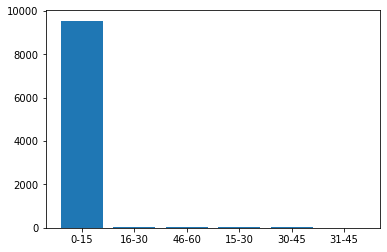

In [121]:
keys = frequency.keys()
values = frequency.values()

plt.bar(keys, values)

# THE END